## EXTRACTING TEXT FROM DIFFERENT FILE SOURCES LIKE IMAGE

* IMAGE
* PDF
* DOCX

#### Extracting Text from Images
OCR (Optical Character Recognition)

In [45]:
pip install pytesseract opencv-python

  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.


In [2]:
#"C:\Users\shamm\Downloads\tesseract-ocr-w64-setup-5.5.0.20241111.exe"

In [3]:
pip install matplotlib

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [4]:
pip install numpy < 2

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [27]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [10]:
image = cv2.imread('handwritten.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # to convert BGR to RGB
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # to convert BGR to Grey
_, image_bw = cv2.threshold(image_grey,100, 255, cv2.THRESH_BINARY) # TO CONVERT GREY TO BLACK N WHITE

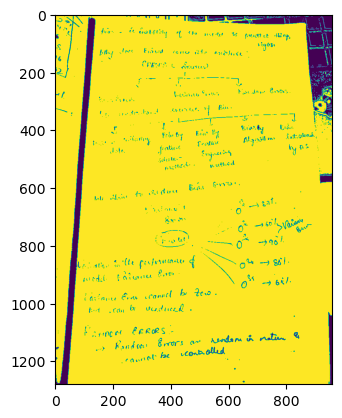

In [11]:
plt.imshow(image_bw)

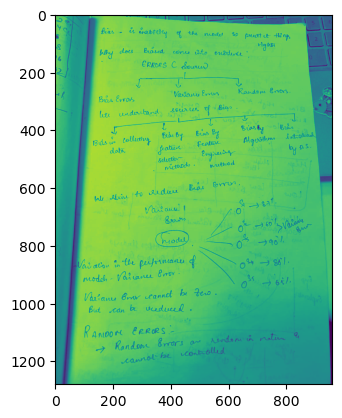

In [12]:
plt.imshow(image_grey)

In [9]:
image_grey

array([[118,  59, 148, ...,  56,  67,  80],
       [115,  55, 144, ...,  94,  95, 101],
       [114,  55, 143, ...,  90,  86,  88],
       ...,
       [ 95,  95,  95, ...,   1,   4,   3],
       [ 94,  95,  95, ...,   1,   4,   3],
       [ 94,  94,  95, ...,   1,   4,   3]], dtype=uint8)

In [ ]:
#cv2.imshow('Grey Image', image_grey)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [18]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\shamm\tesseract.exe"

In [19]:
print(pytesseract.image_to_string(image_bw))

fates fe Gaby
rete % bi tely + hy
: 5 bert be
fies? ok Thing
is
an Pres See Naeh

we perenne ¢ oN o™ —3 oti.

cdl f At usetee Serer

ccanuel bo BOO.

Lei tan PF Codie d

“a ipe et EERRS -

° r a

Random Srvors om
anol Be tenn

a?

care




Note :

Tesseract is working fine when we have a clear image with typed characters , but as we are giving an image of handwriting notes
the text that it is extracting is not good enough. 

Lets try another aproach and use LLM model as OCR , we will compare the results and see 

In [20]:
import google.generativeai as genai
import os

In [21]:
key = os.getenv("GOOGLE_API_KEY")
genai.configure(api_key=key)

In [22]:
model = genai.GenerativeModel('gemini-2.5-flash-lite')


In [23]:
prompt = '''You act as an OCR application on the fiven image and extract the text from it.
Give only the text  as output, do not give any other explanation or description'''

In [ ]:
# Load and process the image


image = cv2.imread('handwritten.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # to convert BGR to RGB
image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # to convert BGR to Grey
_, image_bw = cv2.threshold(image_grey,150, 255, cv2.THRESH_BINARY) # TO CONVERT GREY TO BLACK N WHITE

In [31]:
# The image that CV2 gives is Numpy array formt, we need to convert it to image object
final_image = Image.fromarray(image_bw)

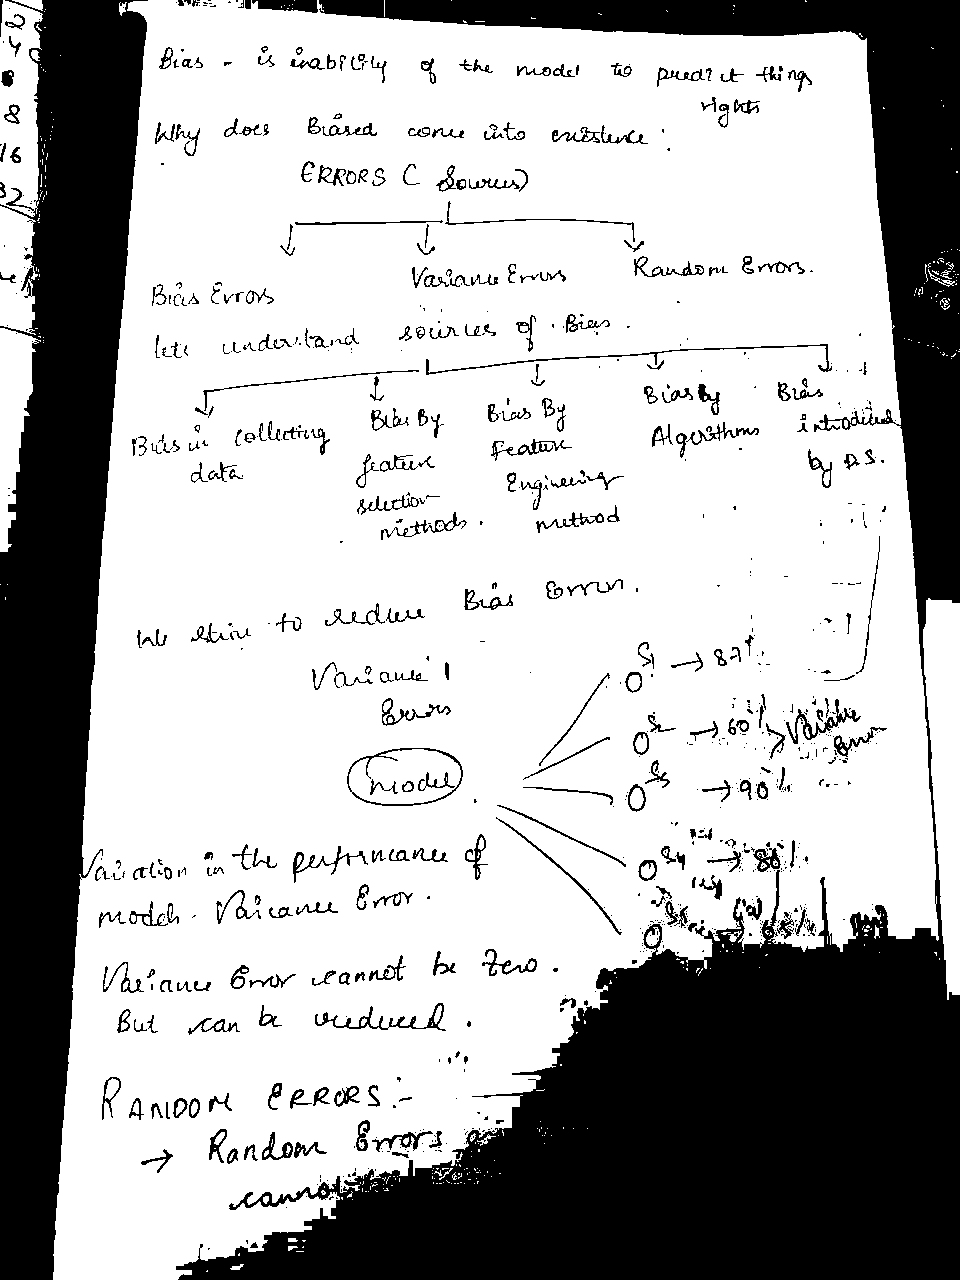

In [32]:
final_image

In [33]:
response = model.generate_content([prompt,final_image])
output_text = response.text
print(output_text)

Bias - is inability of the model to predict things
right,
Why does biased come into existence?
ERRORS ( Sources)

Bias Errors
Variance Errors
Random Errors.

Lets understand sources of Bias.
↓ ↓ ↓ ↓
Bias in collecting Bias By Bias By Bias By Bias
data. feature Feature Algorithms introduced
selection Engineering by AS.
methods. method.

we strive to reduce Bias error.
Variance | o→87%
Errors
(model) 0→60% | Variable
Error
0→90%
Variation in the performance of
model. Variance Error.
054 →88%
125 (25)
Variance Error cannot be zero.
But can be reduced.

RANDOM ERRORS :-
→ Random Errors
cannot


Note:
OCR based on LLM model seems to be a better option to extract text even 
from hand written notes
It may not be able to  extract 100% but still its giving much better output

## Extract text from DOCX (Word Document)

In [34]:
pip install python-docx


Note: you may need to restart the kernel to use updated packages.


In [35]:
from docx import Document

In [37]:
file = Document('statz.docx')


In [38]:
file.paragraphs[12].text

'4. What are skewness and kurtosis?'

In [40]:
text_extracted = ' '.join([p.text for p in file.paragraphs])